In [3]:
# Install necessary libraries (if not already installed)
!pip install pandas scikit-learn matplotlib wget

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import zipfile # Import zipfile library to handle zip files
import wget # Import wget to download the file

# Load the Bank Marketing dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
filename = wget.download(url) # Download the file

# Extract the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.') # Extract all files to current directory

# Read the relevant CSV file (replace 'bank-additional/bank-additional-full.csv' with the correct filename if needed)
bank_data = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Display the first few rows and basic info about the dataset
bank_data.head()

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=db0ff788ba6fd2d601b4c90d18f05ce46da0b508918fad51759c2e845fde4fcc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Data preprocessing
# Assuming 'y' is the target variable indicating whether the customer made a purchase ('yes' or 'no')
# Encoding categorical variables
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)

# Splitting data into features (X) and target variable (y)
X = bank_data.drop('y_yes', axis=1)  # Features
y = bank_data['y_yes']  # Target variable

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Building the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
[[6817  486]
 [ 446  489]]


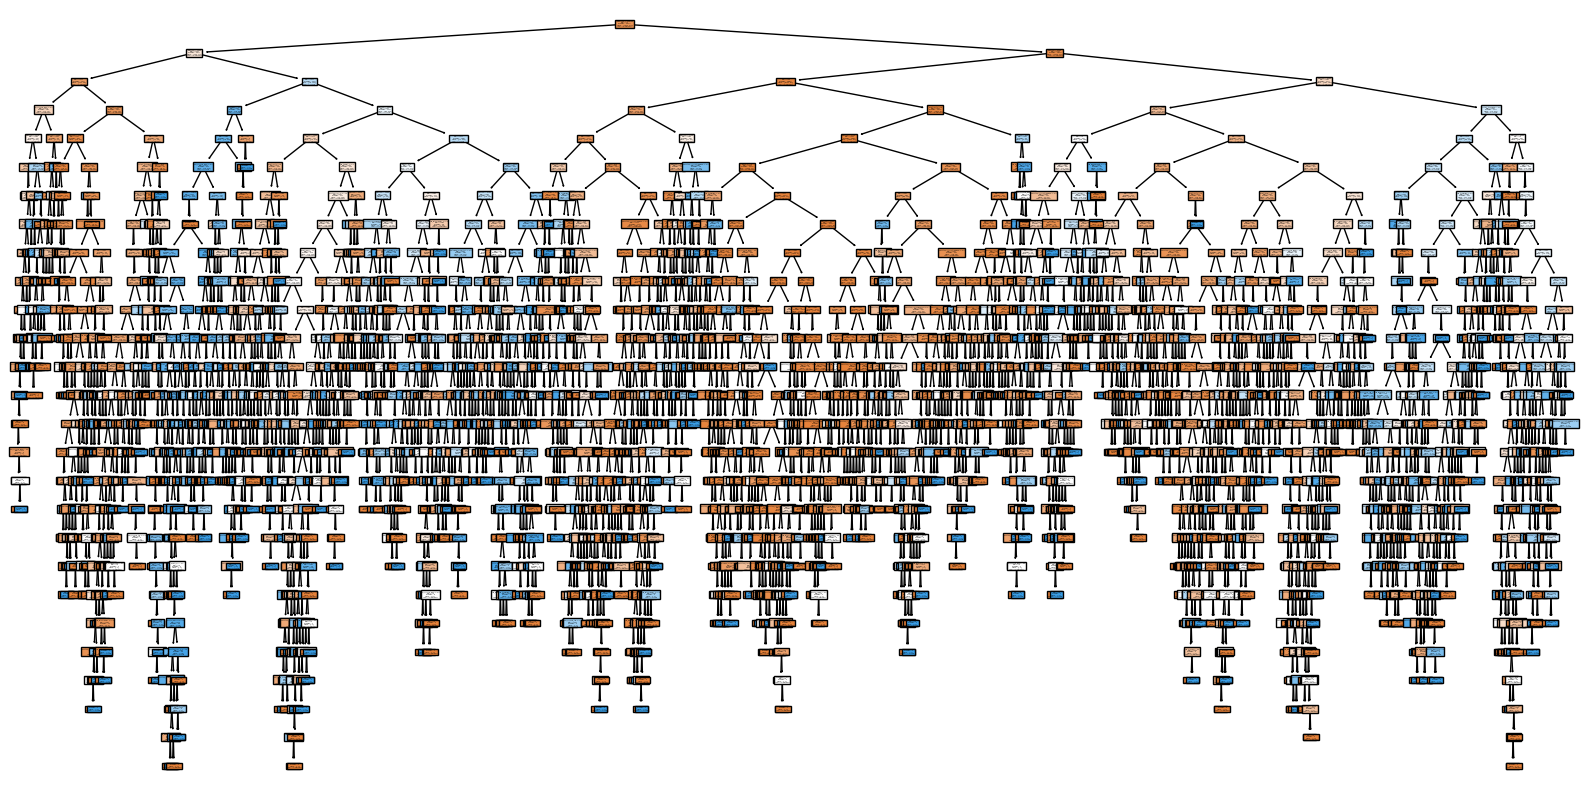

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      7303
        True       0.51      0.52      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
[[6831  472]
 [ 445  490]]


In [10]:
# Install necessary libraries (if not already installed)
!pip install pandas scikit-learn matplotlib wget

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import zipfile # Import zipfile library to handle zip files
import wget  # Import wget to download the file

# Load the Bank Marketing dataset from UCI repository
# This section was missing and is needed to define 'bank_data'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
filename = wget.download(url) # Download the file

# Extract the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.') # Extract all files to current directory

# Read the relevant CSV file (replace 'bank-additional/bank-additional-full.csv' with the correct filename if needed)
bank_data = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Split data into training and testing sets
# Splitting data into features (X) and target variable (y)
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)
X = bank_data.drop('y_yes', axis=1)  # Features
y = bank_data['y_yes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))